In [15]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings(action='once')

In [18]:
import pandas as pd
from prophet import Prophet

In [19]:
df = pd.read_csv('data_Tourist_Nbers.csv')
df.head()

,Date,TouristNumber
0,33604,8414
1,33635,9767
2,33664,13805
3,33695,12987
4,33725,32190


<AxesSubplot:xlabel='ds'>

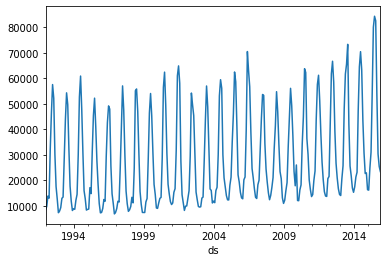

In [20]:
# Create 'ds' column and plot
df['ds'] = pd.date_range(start='1992-01-01', periods=288, freq='M')
df.set_index('ds')['TouristNumber'].plot()

In [21]:
data_fr = df[['ds','TouristNumber']].copy()
data_fr.columns=['ds','y']
data_fr

,ds,y
0,1992-01-31,8414
1,1992-02-29,9767
2,1992-03-31,13805
3,1992-04-30,12987
4,1992-05-31,32190
...,...,...
283,2015-08-31,82593
284,2015-09-30,53472
285,2015-10-31,30361
286,2015-11-30,25436


In [24]:
# with prophet we need 2 columns : a y column and a date column
model = Prophet(interval_width=0.95).fit(data_fr)

16:29:22 - cmdstanpy - INFO - Chain [1] start processing
16:29:22 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = model.make_future_dataframe(periods=100,freq='M')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-31,23988.590109,-322.625683,14825.897762,23988.590109,23988.590109,-16992.580588,-16992.580588,-16992.580588,-16992.580588,-16992.580588,-16992.580588,0.0,0.0,0.0,6996.009521
1,1992-02-29,23993.621729,-220.745717,15179.450242,23993.621729,23993.621729,-16252.694663,-16252.694663,-16252.694663,-16252.694663,-16252.694663,-16252.694663,0.0,0.0,0.0,7740.927066
2,1992-03-31,23999.000358,4498.581512,19516.626952,23999.000358,23999.000358,-12048.029703,-12048.029703,-12048.029703,-12048.029703,-12048.029703,-12048.029703,0.0,0.0,0.0,11950.970655
3,1992-04-30,24004.205482,5635.537274,21298.544532,24004.205482,24004.205482,-10716.531322,-10716.531322,-10716.531322,-10716.531322,-10716.531322,-10716.531322,0.0,0.0,0.0,13287.674160
4,1992-05-31,24009.584110,21850.012317,36952.066183,24009.584110,24009.584110,5361.625048,5361.625048,5361.625048,5361.625048,5361.625048,5361.625048,0.0,0.0,0.0,29371.209159


In [27]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
383,2023-12-31,55869.856965,32428.930595,48058.491153,53071.027060,58594.273910,-15782.754543,-15782.754543,-15782.754543,-15782.754543,-15782.754543,-15782.754543,0.0,0.0,0.0,40087.102422
384,2024-01-31,56025.663168,30857.612979,46343.626828,53202.381538,58793.602312,-16992.580588,-16992.580588,-16992.580588,-16992.580588,-16992.580588,-16992.580588,0.0,0.0,0.0,39033.082580
385,2024-02-29,56171.417358,31164.236574,47612.692001,53323.753428,58962.102965,-16252.694663,-16252.694663,-16252.694663,-16252.694663,-16252.694663,-16252.694663,0.0,0.0,0.0,39918.722695
386,2024-03-31,56327.223561,36164.691811,52555.866639,53440.884513,59151.654345,-12048.029703,-12048.029703,-12048.029703,-12048.029703,-12048.029703,-12048.029703,0.0,0.0,0.0,44279.193858
387,2024-04-30,56478.003758,37879.284836,53832.802121,53563.186256,59337.901326,-10716.531322,-10716.531322,-10716.531322,-10716.531322,-10716.531322,-10716.531322,0.0,0.0,0.0,45761.472436


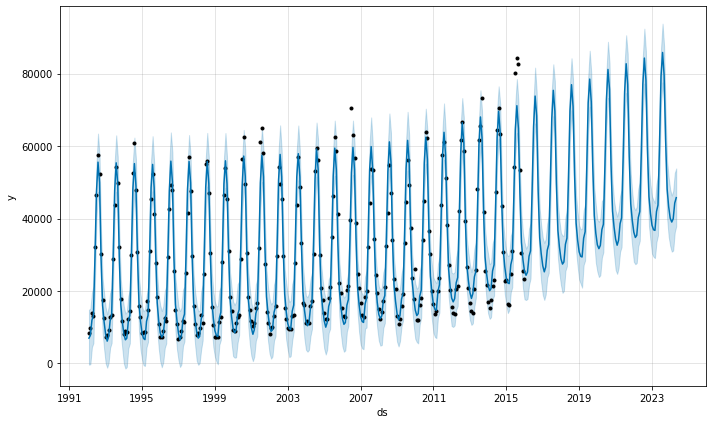

In [28]:
plot1 = model.plot(forecast)

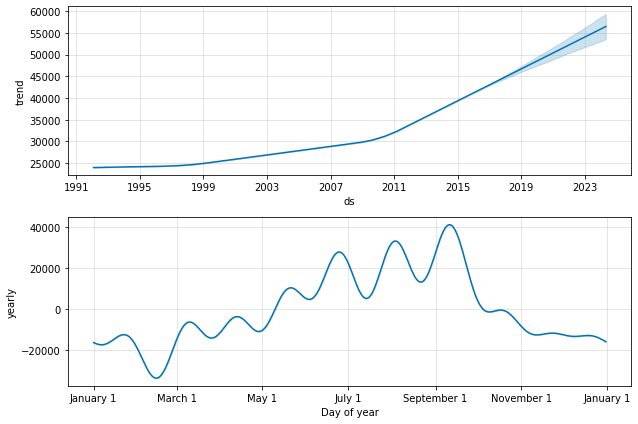

In [29]:
plot2 = model.plot_components(forecast)